
Exercises XP Gold

Last Updated: October 16th, 2024

What you will learn

    Perform scaling and normalization on numerical features in the Titanic dataset.
    Create new composite features in the Titanic dataset to enhance the data analysis.
    Apply Min-Max normalization to the ‘Sales’ and ‘Profit’ columns in an E-Commerce dataset.
    Aggregate daily air quality measurements to monthly averages.


What you will create

    A version of the Titanic dataset with ‘Fare’ and ‘Age’ columns scaled and normalized.
    A transformed Titanic dataset featuring new composite attributes like ‘Family Size’ and ‘IsAlone’.
    A version of the Titanic dataset with ‘Age’ and ‘Fare’ columns normalized using Min-Max and Z-score normalization.
    A Superstore Sales dataset with ‘Sales’ and ‘Profit’ columns normalized using Min-Max normalization.
    The Air Quality dataset grouped by location and month, with average key measurements calculated for each month.


Exercise 1: Data Scaling and Normalization
Instructions

    Identify numerical columns in the dataset like ‘Fare’ and ‘Age’.
    Apply standardization (Z-score scaling) to features with a Gaussian distribution.
    Apply Min-Max normalization to features that require bounded ranges.
    Analyze the effect of scaling and normalization on model performance.

Hint: Use StandardScaler and MinMaxScaler from scikit-learn.


Exercise 2: Creating Composite Features
Instructions

    Create a new feature, ‘Family Size’, by combining ‘SibSp’ (siblings and spouses) and ‘Parch’ (parents and children).
    Create a ‘IsAlone’ feature to indicate whether a passenger is traveling alone.
    Explore the relationship between these new features and the survival rate.

Hint: Use basic arithmetic operations and conditional statements in Pandas.


Exercise 3: Data Normalization on the Titanic Dataset
Instructions

    Import the titanic dataset using Pandas in Python.
    Apply Min-Max normalization and Z-score normalization to these columns : Age and Fare
    Compare the distributions before and after normalization using histograms.


Exercise 4 : Data Reduction and Aggregation
Instructions

    Perform data reduction on the titanic dataset by implementing dimensionality reduction techniques like Principal Component Analysis (PCA).
    Aggregate the data by a categorical column (like date or region) and calculate summary statistics (mean, sum, etc.).
    Visualize the aggregated data using appropriate plots.


Exercise 5: Normalizing E-Commerce Sales Data
Instructions

Dataset: Use the Superstore Sales Data.

    Load the Superstore Sales dataset.
    Perform Min-Max normalization on the ‘Sales’ and ‘Profit’ columns.
    Create new columns, e.g., ‘Sales_normalized’ and ‘Profit_normalized’, to store the normalized values.


Exercise 6: Aggregating Air Quality Data
Instructions

Dataset: Use the Air Quality Data in India.

    Load the Air Quality dataset.
    Convert the ‘Date’ column to a datetime format.
    Group the data by location and month, calculating the average of key measurements (e.g., PM2.5, PM10, NO2) for each month.
    Store the aggregated data in a new DataFrame and analyze trends in air quality over time.


In [5]:
import pandas as pd

df = pd.read_csv('train.csv')

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

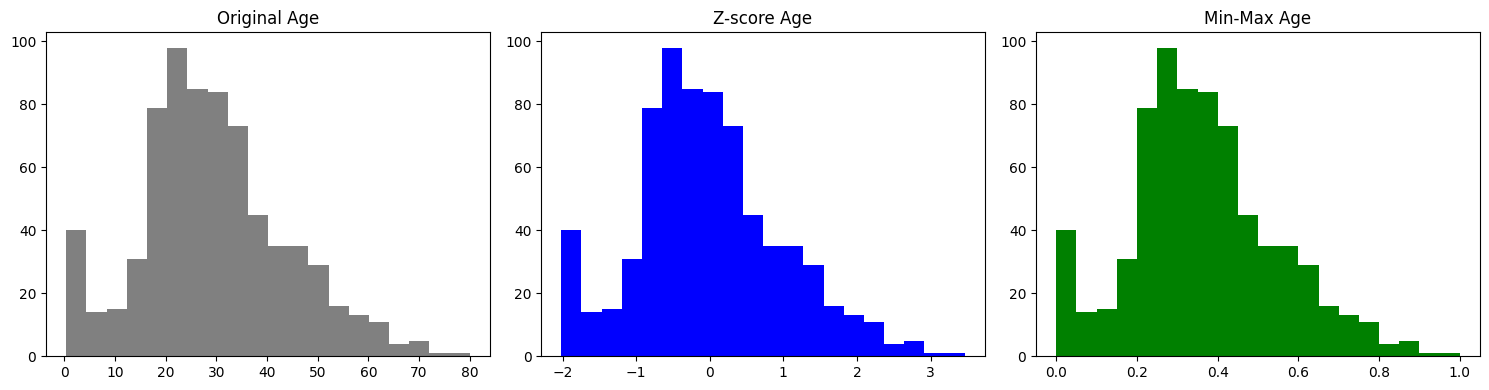

In [ ]:
df = pd.read_csv('train.csv')

# colonnes numériques
numeric_cols = ['Age', 'Fare']
df = df[numeric_cols].dropna()

# standardisation
scaler_std = StandardScaler()
df['Age_z'] = scaler_std.fit_transform(df[['Age']])
df['Fare_z'] = scaler_std.fit_transform(df[['Fare']])

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
df['Age_minmax'] = scaler_minmax.fit_transform(df[['Age']])
df['Fare_minmax'] = scaler_minmax.fit_transform(df[['Fare']])

# Visualisation
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].hist(df['Age'], bins=20, color='gray')
axs[0].set_title('Original Age')

axs[1].hist(df['Age_z'], bins=20, color='blue')
axs[1].set_title('Z-score Age')

axs[2].hist(df['Age_minmax'], bins=20, color='green')
axs[2].set_title('Min-Max Age')

plt.tight_layout()
plt.show()

   SibSp  Parch  FamilySize  IsAlone
0      1      0           2        0
1      1      0           2        0
2      0      0           1        1
3      1      0           2        0
4      0      0           1        1
5      0      0           1        1
6      0      0           1        1
7      3      1           5        0
8      0      2           3        0
9      1      0           2        0


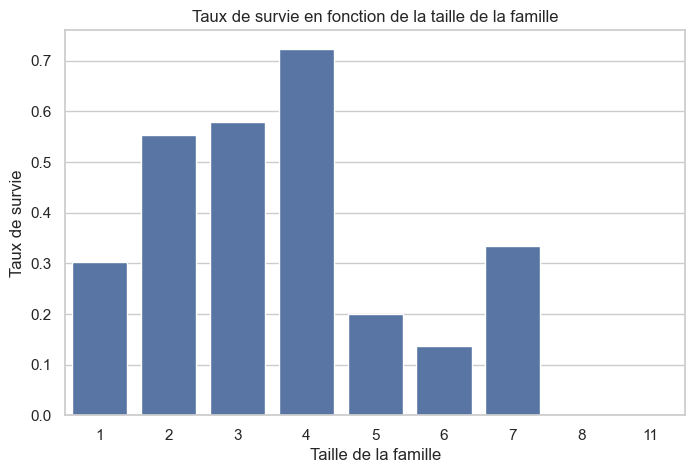

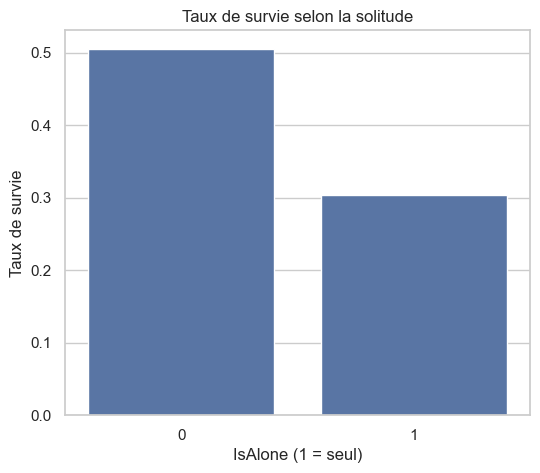

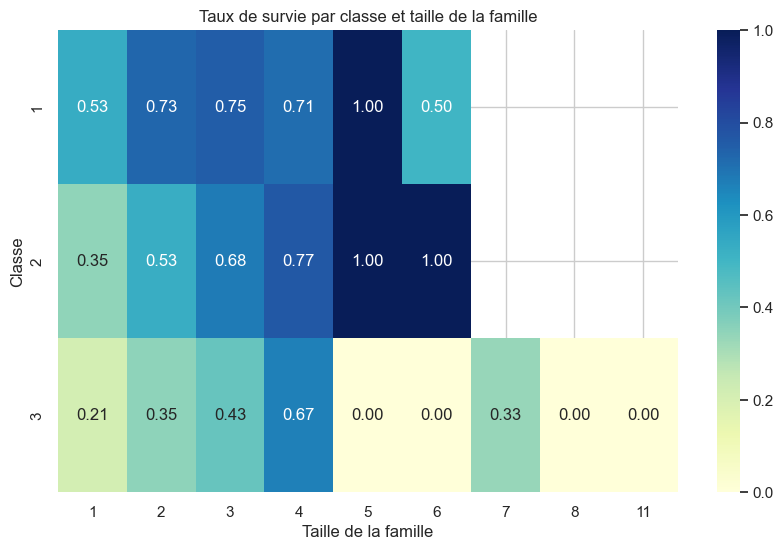

In [15]:
df = pd.read_csv('train.csv')

# FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Isalone
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

# verif
print(df[['SibSp', 'Parch', 'FamilySize', 'IsAlone']].head(10))

sns.set(style="whitegrid")

# taux de survie selon la taille de la famille
plt.figure(figsize=(8, 5))
sns.barplot(x="FamilySize", y="Survived", data=df, errorbar=None)
plt.title("Taux de survie en fonction de la taille de la famille")
plt.xlabel("Taille de la famille")
plt.ylabel("Taux de survie")
plt.show()

# taux de survie selon qu'on est seul ou non
plt.figure(figsize=(6, 5))
sns.barplot(x="IsAlone", y="Survived", data=df, errorbar=None)
plt.title("Taux de survie selon la solitude")
plt.xlabel("IsAlone (1 = seul)")
plt.ylabel("Taux de survie")
plt.show()

# Pour le fun

pivot = df.pivot_table(index='Pclass', columns='FamilySize', values='Survived', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Taux de survie par classe et taille de la famille")
plt.ylabel("Classe")
plt.xlabel("Taille de la famille")
plt.show()


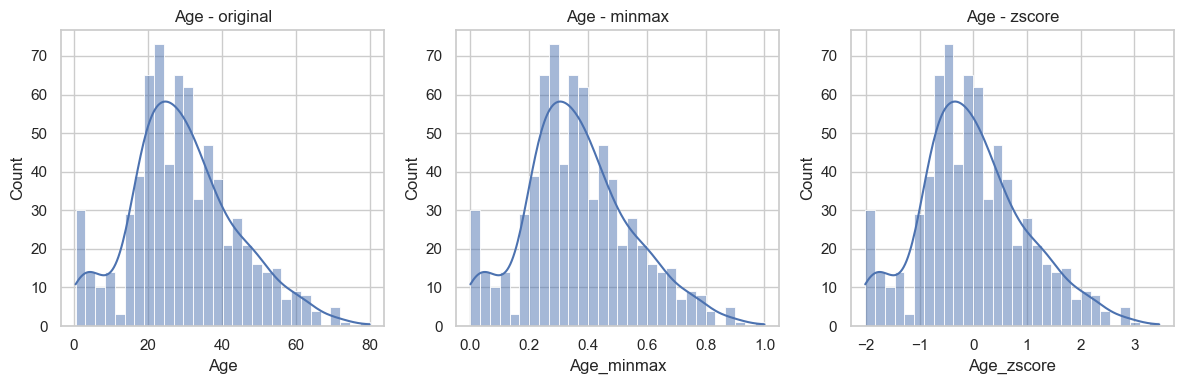

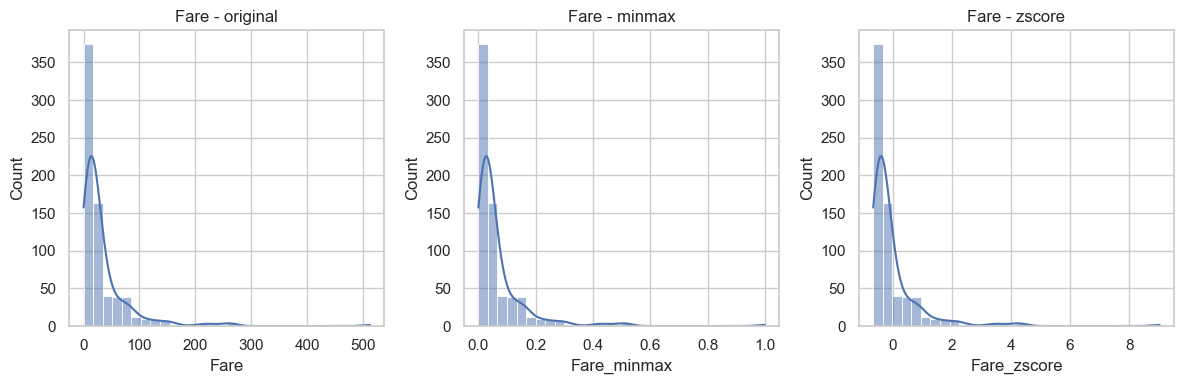

In [ ]:
df = pd.read_csv("train.csv")

# garde que age et fare sans valeur manquante
df_clean = df[["Age", "Fare"]].dropna()

# init des scalers
minmax = MinMaxScaler()
zscore = StandardScaler()

# minmax 0-1
df_clean["Age_minmax"] = minmax.fit_transform(df_clean[["Age"]])
df_clean["Fare_minmax"] = minmax.fit_transform(df_clean[["Fare"]])

# zscore centree reduite
df_clean["Age_zscore"] = zscore.fit_transform(df_clean[["Age"]])
df_clean["Fare_zscore"] = zscore.fit_transform(df_clean[["Fare"]])

# plot age
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(df_clean["Age"], kde=True, bins=30)
plt.title("Age - original")

plt.subplot(1, 3, 2)
sns.histplot(df_clean["Age_minmax"], kde=True, bins=30)
plt.title("Age - minmax")

plt.subplot(1, 3, 3)
sns.histplot(df_clean["Age_zscore"], kde=True, bins=30)
plt.title("Age - zscore")

plt.tight_layout()
plt.show()

# plot fare
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(df_clean["Fare"], kde=True, bins=30)
plt.title("Fare - original")

plt.subplot(1, 3, 2)
sns.histplot(df_clean["Fare_minmax"], kde=True, bins=30)
plt.title("Fare - minmax")

plt.subplot(1, 3, 3)
sns.histplot(df_clean["Fare_zscore"], kde=True, bins=30)
plt.title("Fare - zscore")

plt.tight_layout()
plt.show()

In [ ]:
df = pd.read_csv("train.csv")

# garde les colonnes numeriques utiles
num_cols = ["Age", "Fare", "SibSp", "Parch"]
df_num = df[num_cols].dropna()

# standardise avant PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)

# pca vers 2 colonnes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# plot des 2 nouvelles colonnes
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6)
plt.title("PCA - 2 composants")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid()
plt.tight_layout()
plt.show()

# supprime lignes avec age ou fare manquant
df_clean = df[["Pclass", "Age", "Fare"]].dropna()

# groupby classe
agg_df = df_clean.groupby("Pclass")[["Age", "Fare"]].agg(["mean", "median", "count"]).reset_index()

# affiche tableau agregé
print(agg_df)

# plot des moyennes par classe
plt.figure(figsize=(8, 4))
sns.barplot(data=df_clean, x="Pclass", y="Fare", estimator="mean")
plt.title("Moyenne du tarif par classe")
plt.ylabel("tarif moyen")
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'titanic.csv'